# collaborative item based Recommender


In [29]:
import pandas as pd
from scipy import sparse # shrink filesize of df
# pw will give us distances (0...n) based on cosine similarity
from sklearn.metrics.pairwise import pairwise_distances
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
#from recommenders import collab_recommender;

In [18]:
books=  pd.read_csv("../data/books.csv")
print( f"shape of the books dataframe is {books.shape}")
books.head(1)

shape of the books dataframe is (10000, 23)


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...


In [19]:
ratings = pd.read_csv("../data/ratings.csv")
print( f"shape of the books dataframe is {ratings.shape}")
ratings.head(1)

shape of the books dataframe is (5976479, 3)


,user_id,book_id,rating
0,1,258,5


In [20]:
# len(ratings['user_id'].unique()),len(to_read['user_id'].unique())
# len(set(ratings['user_id']) - set(to_read['user_id'])),
# len(set(to_read['user_id']) - set(ratings['user_id']))

In [21]:
books =pd.merge(books[['book_id','title']],ratings, how ='inner',left_on ='book_id',right_on='book_id')
books.head(1)

,book_id,title,user_id,rating
0,1,"The Hunger Games (The Hunger Games, #1)",2886,5


In [22]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [23]:
len(ratings['book_id'].unique()),len(ratings['user_id'].unique())
# we  have. double the number of books than the users so , there is a very good chance that
# each user has read multiple books and they have over lap.

(10000, 53424)

In [24]:
# Find out if users have done  multiple book reviews?
ratings.groupby('user_id')['book_id'].value_counts().sort_values()

user_id  book_id
1        4          1
34952    1758       1
         1624       1
         1597       1
         1582       1
                   ..
17159    1366       1
         1326       1
         1312       1
         1115       1
53424    9849       1
Name: book_id, Length: 5976479, dtype: int64

In [36]:
ratings.groupby('book_id')['user_id'].count().describe()

,count,mean,std,min,25%,50%,75%,max
book_id,,,,,,,,
1,22806.0,27514.542182,15389.503456,9.0,14403.25,27720.0,40967.50,53424.0
2,21850.0,27725.932082,15358.695192,2.0,14680.50,27914.0,41122.50,53424.0
3,16931.0,27548.405351,15169.999495,9.0,14652.00,27693.0,40714.00,53424.0
4,19088.0,26336.634849,15475.698671,1.0,13099.75,25977.0,39749.50,53424.0
5,16604.0,26029.760479,15667.269148,2.0,12375.25,25539.0,39755.75,53421.0
...,...,...,...,...,...,...,...,...
9996,141.0,30280.418440,14496.587474,1813.0,15596.00,30551.0,43946.00,53103.0
9997,93.0,25518.043011,13799.857791,52.0,15450.00,25736.0,35511.00,52324.0
9998,102.0,24386.509804,15824.670557,167.0,10666.25,24230.0,38949.25,53249.0


Text(0.5, 1.0, ' Numer of users reviewing the books')

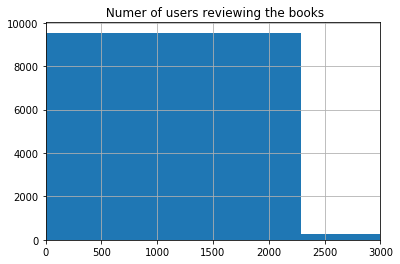

In [31]:
# Find out if users have done  multiple book reviews?
ratings.groupby('book_id')['user_id'].count().hist()
plt.xlim(0,3000)
plt.title(" Numer of users reviewing the books")

In [ ]:
# Are there any books that we don't have ratings for?
print(f" Difference in books in ratings and books dataset {len(set(books['book_id']) - set(ratings['book_id']))}.")
print(f" Out of {len(set(books['book_id']))} books we have ratings for all {len(set(ratings['book_id']))} books.")

###### Create pivot table
---

Because we're creating an item-based collaborative recommender (where item in this case is our books), we'll set up our pivot table as follows:
1. The `title` will be the index
2. The `userId` will be the column
3. The `rating` will be the value

In [ ]:
pivot =books.pivot_table(index ='title',columns ='user_id',values='rating')
pivot

In [1]:
#turn the matrix in to  sparse matrix
pivot_sparse = sparse.csr_matrix(pivot.fillna(0))
pivot_sparse.shape

NameError: name 'sparse' is not defined

In [ ]:
import sys
sys.getsizeof(pivot),sys.getsizeof(pivot_sparse)

In [ ]:
# Feed sparse matrix to pair wise disance to calculate. distance between every book
recommender =pairwise_distances(pivot_sparse,metric='cosine')

In [ ]:
#Create distance dataframe
recommender_df = pd.DataFrame(recommender , index =pivot.index,columns =pivot.index)
recommender_df.head()

In [ ]:
recommender_df['The Great Gatsby'].sort_values()[1:5]

In [19]:
helper.find_titles(books,title ="positive")

['The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Positive Thinking',
 'The Power of Posit

In [ ]:
my_fav_books = ['The Alchemist','The Adventures of Sherlock Holmes','The Great Gatsby','To Kill a Mockingbird','The Da Vinci Code (Robert Langdon, #2)','The Fellowship of the Ring (The Lord of the Rings, #1)']

###### References
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

https://www.kaggle.com/emilytries/plotly-library-in-goodreads-books-dataset

https://towardsdatascience.com/my-journey-to-building-book-recommendation-system-5ec959c41847